In [1]:
%%file func/preprocess.m
function [I, A] = preprocess(path)
    dimension = 100;
    img = imread(path);
    I = im2double(img);
    sz = min(size(img));
    img = imresize(img, dimension / sz);
    A = im2double(img);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/preprocess.m'.


In [2]:
addpath('func/');
Is = {};
As = {};
paths = ["CARTOON.jpg", "flowergray.jpg"];
% for path = ["CARTOON.jpg", "flowergray.jpg", "kitty.jpg", "polarcities.jpg", "text.jpg"]
for path = paths
    [I, A] = preprocess(path);
    Is{end + 1} = I;
    As{end + 1} = A;
end

In [3]:
%%file func/I_looper.m
function I_looper(fc, Is, paths)
    for i = 1:length(Is)
        fc(Is{i}, paths(i));
    end
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/I_looper.m'.


In [4]:
%%file func/A_looper.m
function A_looper(fc, As, paths)
    for i = 1:length(As)
        fc(As{i}, paths(i));
    end
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/A_looper.m'.


# Part 0
## a

In [5]:
%%file func/sort_plot.m
function sort_plot(A, p)
    dimension = 100;
    flatten = reshape(A, 1, dimension^2);
    sorted = sort(flatten);
    x = 1:dimension^2;
    f = figure;
    plot(x(1:length(sorted)), sorted(1:length(sorted)),'-');
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/sort_plot.m'.


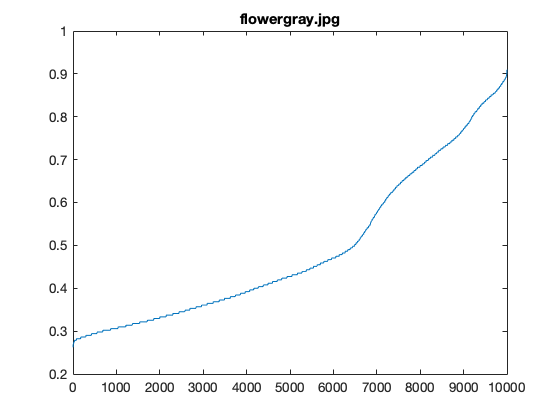

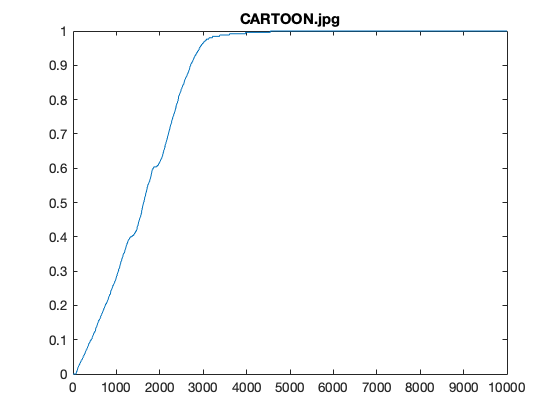

In [6]:
A_looper(@sort_plot, As, paths);

## b

In [7]:
%%file func/flatten.m
function flatten(A, p)
    dimension = 100;
    flatten = reshape(A, 1, dimension^2);
    f = figure;
    histogram(A, 32);
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/flatten.m'.


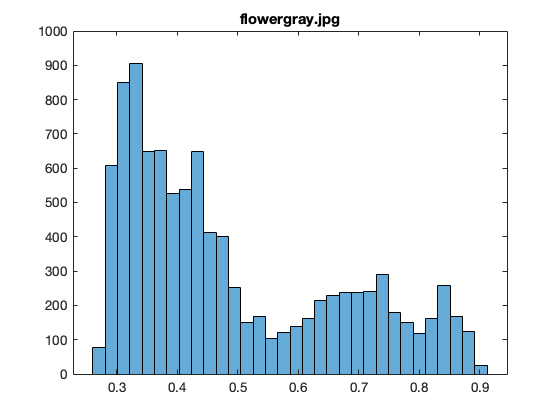

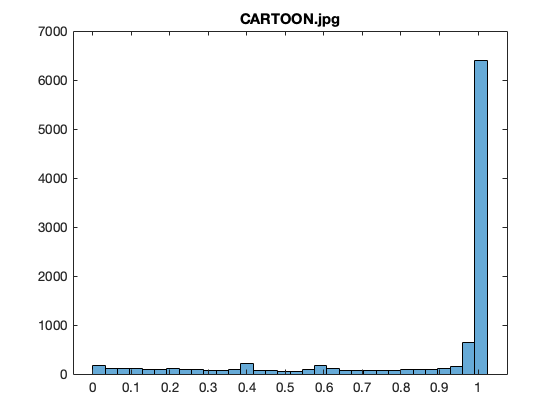

In [8]:
%plot inline
A_looper(@flatten, As, paths);

## c

In [9]:
%%file func/thres.m
function thres(A, p)
    thres = 0.3;
    B = A;
    B(B > thres) = 1.0;
    B(B ~= 1.0) = 0.0;
    f = figure;
    subplot(1,2,1), imshow(A);
    subplot(1,2,2), imshow(B);
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/thres.m'.


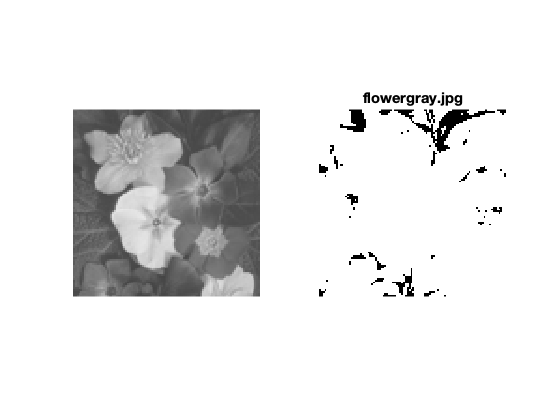

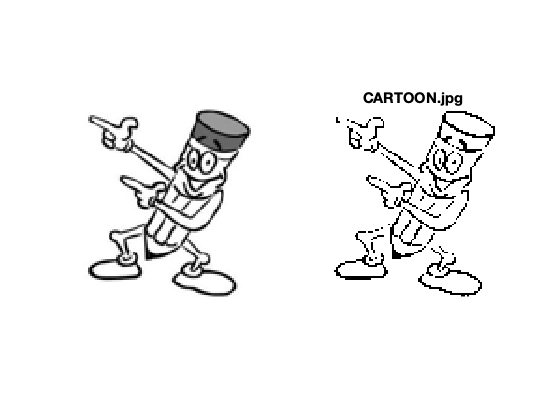

In [10]:
%plot inline
A_looper(@thres, As, paths);

## d

In [11]:
%%file func/avg.m
function avg(A, p)
    B = A;
    B = B - mean(B);
    B(B < 0.0) = 0.0;
    f = figure;
    imshow(B);
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/avg.m'.


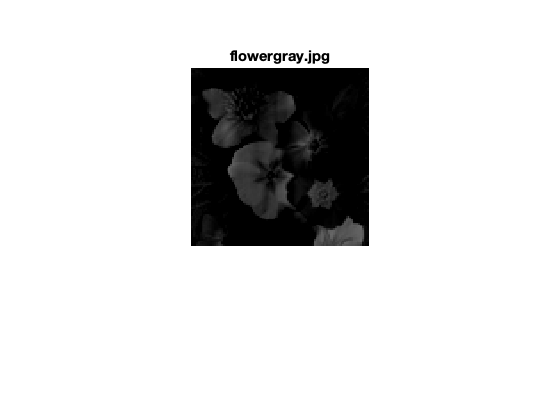

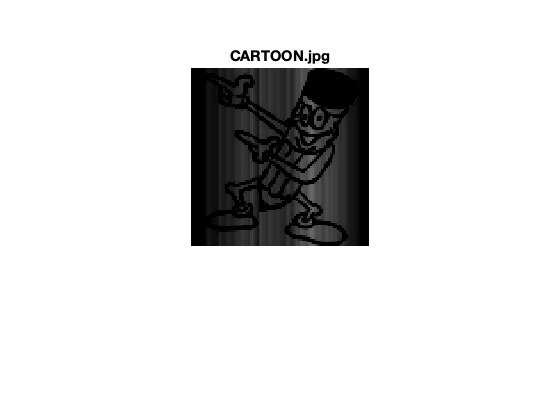

In [12]:
%plot inline
A_looper(@avg, As, paths);

## e

In [13]:
y = 1:8;
s = reshape(y, length(y) / 2, 2);
s


s =

     1     5
     2     6
     3     7
     4     8



## f

In [14]:
%%file func/half.m
function half(A, p)
    dimension = 100;
    v = 1:2:dimension;
    hf = A(v, v);
    f = figure;
    imshow(hf);
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/half.m'.



v =

  Columns 1 through 13

     1     3     5     7     9    11    13    15    17    19    21    23    25

  Columns 14 through 26

    27    29    31    33    35    37    39    41    43    45    47    49    51

  Columns 27 through 39

    53    55    57    59    61    63    65    67    69    71    73    75    77

  Columns 40 through 50

    79    81    83    85    87    89    91    93    95    97    99



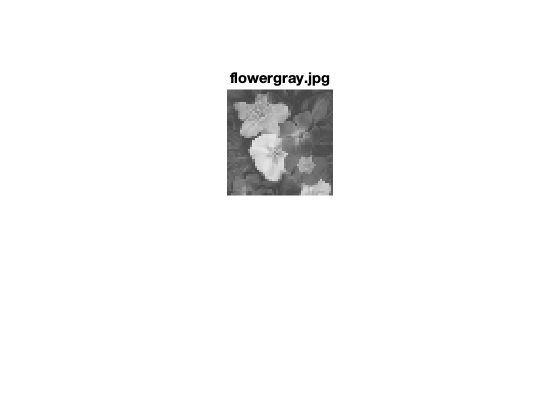

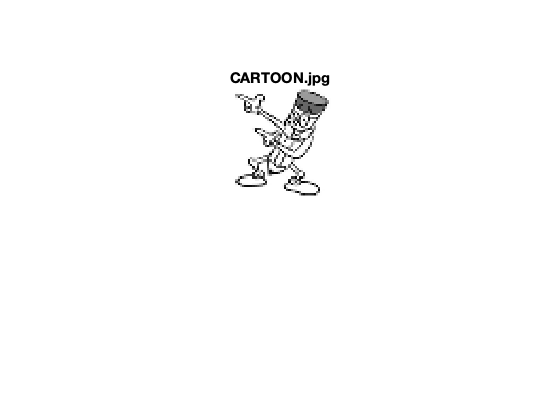

In [15]:
%plot inline
v = 1:2:99;
v
A_looper(@half, As, paths);

## g

In [16]:
%%file func/imfilt.m
function imfilt(A, p)
    sz = size(A);
    f = figure;
    h1 = fspecial('gaussian', sz, 0.5);
    subplot(1,3,1), imshow(imfilter(A, h1, 'full'));
    h2 = fspecial('gaussian', sz, 2);
    subplot(1,3,2), imshow(imfilter(A, h2, 'full'));
    h3 = fspecial('gaussian', sz / 2, 2);
    subplot(1,3,3), imshow(imfilter(A, h3, 'full'));
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/imfilt.m'.


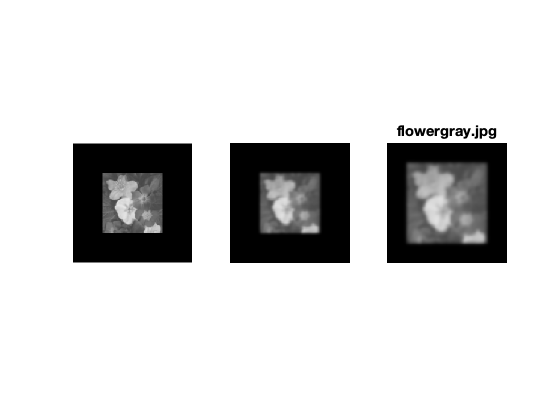

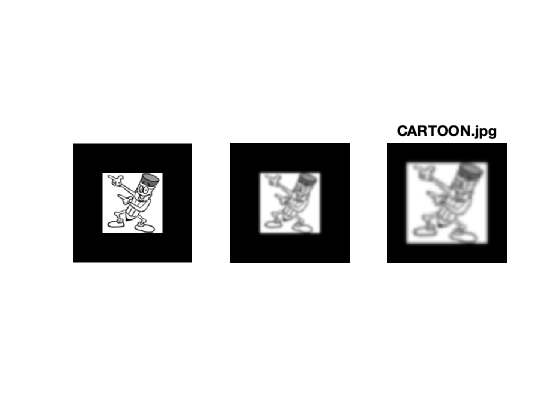

In [17]:
%plot inline
A_looper(@imfilt, As, paths);

The filtered pictures are always smaller than the original one.

Filter __h1__ has the size of original picture (100 x 100), with sigma = 0.5

Filter __h2__ has the size of original picture (100 x 100), with sigma = 2

Filter __h3__ has the size of one fourth of the original picture (50 x 50), with sigma = 2

The filters __h1__ and __h2__ has the same size but different sigma, __h2__ with larger sigma produces a more blurred picture.

The filters __h2__ and __h3__ has the same sigma but different sizes, __h3__ with smaller filter size producess a larger filtered picture.

## h

In [18]:
%%file func/convolution.m
function convolution(A, p)
    sz = size(A);
    f = figure;
    h1 = fspecial('gaussian', sz, 0.5);
    subplot(1,3,1), imshow(conv2(A, h1));
    h2 = fspecial('gaussian', sz, 2);
    subplot(1,3,2), imshow(conv2(A, h2));
    h3 = fspecial('gaussian', sz / 2, 2);
    subplot(1,3,3), imshow(conv2(A, h3));
    title(p);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/convolution.m'.


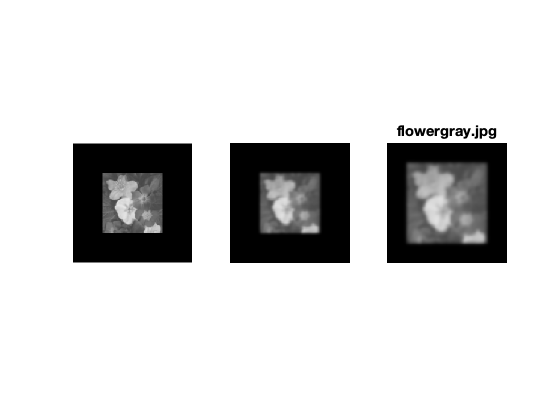

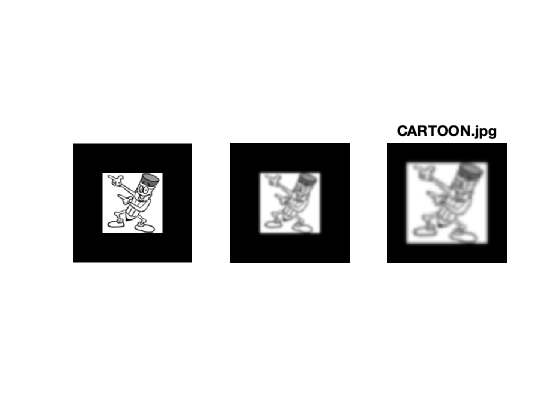

In [19]:
%plot inline
A_looper(@convolution, As, paths);

There is no difference between applying an image filting function and convolution when the image filter used in the two functions are Gaussian image filters.

The Gaussian image filter applies mean image filter over pixels covered by the kernal at a given time step, but change the pixel weights of universally one in mean image filter to values from a Gaussian distribution.

The 2D convolution operation takes each pixel value covered by the kernal at a given time step and perform elementwise multiplication. When the kernal is a Gaussian distribution, it performs exactly the same operation as a Gaussian image filter.

Reference:
https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

# Part 1

In [20]:
%%file func/P_looper.m
function [subsample, blur] = P_looper(fc, Is, paths)
    blur = {};
    subsample = {};
    for i = 1:length(Is)
        [s, b] = fc(Is{i}, paths(i));
        subsample{end + 1} = s;
        blur{end + 1} = b;
    end
end    

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/P_looper.m'.


In [21]:
%%file func/pyramid.m
function [subsample, blur] = pyramid(I, p)
    h = fspecial('average', [2, 2]);
    img = I;
    sz = size(I);
    z = sz(1);
    N = log2(sz(1));
    blur = {};
    subsample = {};

    f = figure;
    a = subplot(3, 3, 1);
    imshow(img);
    subsample{end + 1} = img;
    title(p);
    for i = 1:N
        img = conv2(img, h, 'same');
        blur{end + 1} = img;
        v = 1:2:sz(1);
        img = img(v, v);
        subsample{end + 1} = img;
        sz = size(img);
        if sz(1) > 1
            [X, Y] = meshgrid(1:sz(1));
            [Xq, Yq] = meshgrid(1:((sz(1) - 1.) / z):sz(1));
            Xq = Xq(1:size(Xq) - 1, 1:size(Xq) - 1);
            Yq = Yq(1:size(Yq) - 1, 1:size(Yq) - 1);
            int = interp2(X, Y, img, Xq, Yq);
            a = subplot(3, 3, i + 1);
            imshow(int);
        else
            % Interpolation function does not work for single pixel
            int=imresize(img, [256, 256], 'bilinear');
            a = subplot(3, 3, i + 1);
            imshow(int);
        end
    end
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/pyramid.m'.


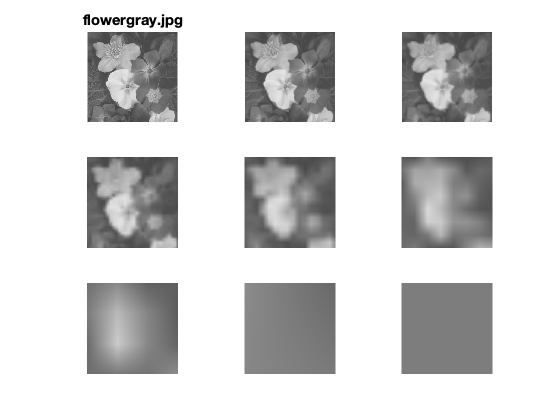

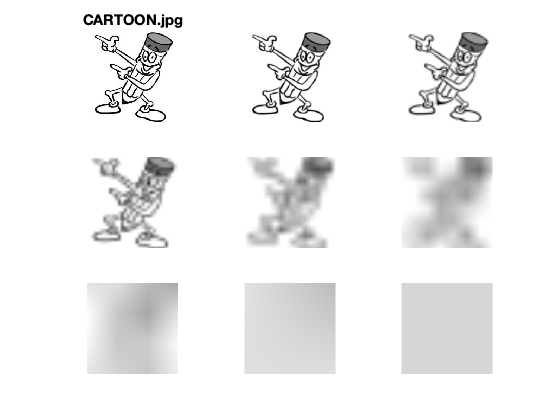

In [22]:
%plot inline
[subsample, blur] = P_looper(@pyramid, Is, paths);

# Part 2

In [59]:
%%file func/lpyramid.m
function lpyramid(subsamples, blurs, paths)
    for i = 1:length(blurs)
        f = figure;
        for j = 1:length(blurs{i})
            subplot(2, length(blurs{i}) / 2, j);
            imshow(mat2gray(subsamples{i}{j} - blurs{i}{j}));
        end
    end
end      

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/lpyramid.m'.


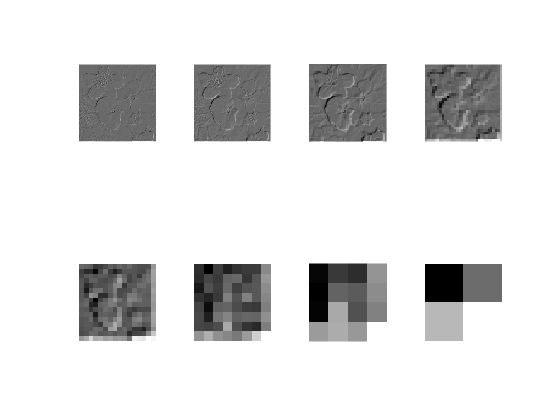

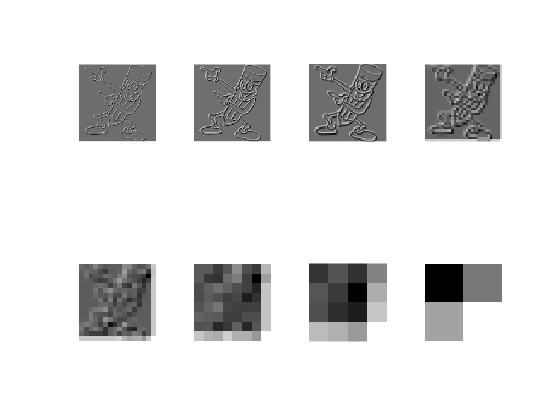

In [61]:
lpyramid(subsample, blur, paths);

# Part 3

In [122]:
%%file func/neighbor.m
function n = neighbor(A, Map, idx)
    Map(idx) = 1;
    n = A(conv2(Map,[1,1,1;1,0,1;1,1,1],'same') > 0);
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/neighbor.m'.


In [140]:
%%file func/lapop.m
function lapop(subsamples, blurs, paths)
    addpath('func/');
    laplacian = ones(3, 3) * (-1. / 8.);
    laplacian(2, 2) = 1;
    for i = 1:length(blurs)
        for j = 1:2%length(blurs{i})
            img = imfilter(blurs{i}{j}, laplacian);
            [Gmag, Gdir] = imgradient(img, 'sobel');
            idx = find(Gmag > 0);
            Gmag(idx) = 1.;
            idx = find(Gmag <= 0);
            Gmag(idx) = 0;
            sz = size(Gmag);
            Map = zeros(sz);
            zcross = zeros(sz);
            for k = 1:sz(1)
                for m = 1:sz(2)
                    n = neighbor(Gmag, Map, [k, m]);
                    s = size(n);
                    if sum(n) ~= 0 & sum(n) ~= s(1)
                        zcross(k, m) = 1;
                    end
                end
            end
        end
    end
end 

Created file '/Users/zengs/Documents/Code/VisualComp/HW1/func/lapop.m'.


In [144]:
lapop(subsample, blur, paths);

     1
     1
     1

     3     1

     1
     1
     1
     1
     1
     1

     6     1

     1
     1
     1
     1
     1
     1

     6     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

     1
     1
     1
     1
     1
     1
     1
     1

     8     1

